In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:


# Assuming "diabetes.csv" is present in the current directory
# and is loaded as dia_df
dia_df = pd.read_csv("diabetes.csv")
print('Dataset Loaded...')

# Replacing 0s with medians as per your provided code
non_zero_blood_pressure = dia_df['BloodPressure'][dia_df['BloodPressure'] != 0]
median_blood_pressure = non_zero_blood_pressure.median()
dia_df['BloodPressure'] = dia_df['BloodPressure'].replace(0, median_blood_pressure)

non_zero_skin_thickness = dia_df['SkinThickness'][dia_df['SkinThickness'] != 0]
median_skin_thickness = non_zero_skin_thickness.median()
dia_df['SkinThickness'] = dia_df['SkinThickness'].replace(0, median_skin_thickness)

non_zero_insulin = dia_df['Insulin'][dia_df['Insulin'] != 0]
median_insulin = non_zero_insulin.median()
dia_df['Insulin'] = dia_df['Insulin'].replace(0, median_insulin)

non_zero_bmi = dia_df['BMI'][dia_df['BMI'] != 0]
median_bmi = non_zero_bmi.median()
dia_df['BMI'] = dia_df['BMI'].replace(0, median_bmi)

# Print the updated dataset with Median BloodPressure, SkinThickness, Insulin, BMI Replacing Zeros
print('Updated Dataset with Median BloodPressure, SkinThickness, Insulin, BMI Replacing Zeros:')
print(dia_df.head(50))

# Implementing the Standard Scaler from scratch
def standard_scaler(df):

    scaled_df = df.copy()
    for column in scaled_df.columns:
        if np.issubdtype(scaled_df[column].dtype, np.number): # Check if column is numeric
            mean = scaled_df[column].mean()
            std_dev = scaled_df[column].std()
            scaled_df[column] = (scaled_df[column] - mean) / std_dev
            
    return scaled_df

# Apply the standard scaler to the diabetes dataset
scaled_dia_df = standard_scaler(dia_df)


print(scaled_dia_df.head())


In [ ]:

# Separate feature input values from output labels for training the model
X = scaled_dia_df.drop(['Outcome'], axis=1)
y = scaled_dia_df['Outcome'] 

# Ensure that the 'Outcome' column is of integer type
y = y.astype(int)

# 20% of data allocated to testing whereas 80% is allocated to training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)


classifier = knn_clf.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

# PERFORMANCE METRICS test set 80 of data, Rows from Confusion Matrix
print("Testing on 80% of data")
print("Weighted Metrics")
print("Accuracy:", np.round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", np.round(metrics.precision_score(y_test, y_pred, average='weighted'), 4))
print("Recall:", np.round(metrics.recall_score(y_test, y_pred, average='weighted'), 4))
print("F1 Score:", np.round(metrics.f1_score(y_test, y_pred, average='weighted'), 4))


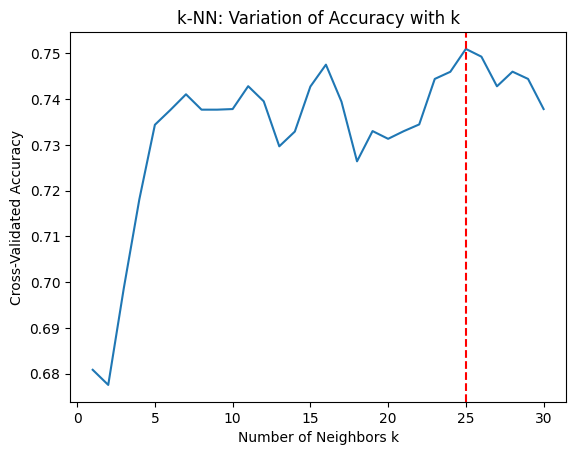

Optimal number of neighbors (k) is: 25


In [62]:

k_values = list(range(1, 31))


cv_scores = []

# Perform 10-fold cross-validation
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k that gave the maximum cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]

# Plot k vs cross-validation score
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN: Variation of Accuracy with k')
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.show()

# Print the optimal k value
print("Optimal number of neighbors (k) is:", optimal_k)


In [60]:
scores = cross_val_score(classifier, X, y, cv=5, scoring="accuracy")
print(scores)
print("Mean from applying 5 fold cross-validation", np.round(scores.mean(), 4))
print("Standard deviation from applying 5 fold cross-validation", np.round(scores.std(), 4))

[0.77272727 0.7012987  0.76623377 0.74509804 0.78431373]
Mean from applying 5 fold cross-validation 0.7539
Standard deviation from applying 5 fold cross-validation 0.0292


In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(np.round(metrics.accuracy_score(y_test, y_pred), 4))
plt.title(all_sample_title, size=15);
print(classification_report(y_test, y_pred))



In [ ]:
#USE MARKDOWN TO EXPLAIN ACCURACY OF YOUR MODEL


# The accuracy score of the KNearestNeighbor classifier for the give diabates dataset is 76.62 percent. 
# The accuracy score is supported by metrics derived from the confusion matrix, which include precision, 
# recall and f1 score. The f1 score which is the harmonic mean of the precision and recall scores is 
# equivalent to the accuracy score.


In [61]:

loo = LeaveOneOut()

# Use the cross_val_score function with the Leave-One-Out cross-validator
scores = cross_val_score(knn_clf, X, y, cv=loo, scoring="accuracy")

print("Mean from applying Leave-One-Out Cross-Validation:", scores.mean())
print("Standard deviation from applying Leave-One-Out Cross-Validation:", scores.std())

Mean from applying Leave-One-Out Cross-Validation: 0.7356770833333334
Standard deviation from applying Leave-One-Out Cross-Validation: 0.44097200862582314
